In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,
                                            n_features=1,
                                            noise = 20,
                                            random_state=1)

In [8]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape[0])
y = y.view(y.shape[0], 1)

100


In [9]:
n_samples, n_features = X.shape

In [10]:
# defining model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [ ]:
# loss and optimizer
learning_rate = 0.01
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
# training loop

num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_hat = model(X)
    l = loss(y_hat, y)
    
    # backward pass
    l.backward()
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: loss = {l:.4f}')

epoch 10: loss = 4290.3574
epoch 20: loss = 3203.7700
epoch 30: loss = 2417.3118
epoch 40: loss = 1847.4879
epoch 50: loss = 1434.2278
epoch 60: loss = 1134.2456
epoch 70: loss = 916.3122
epoch 80: loss = 757.8658
epoch 90: loss = 642.5888
epoch 100: loss = 558.6655


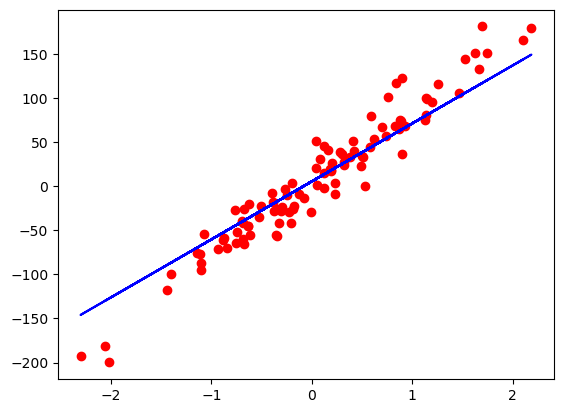

In [14]:
# plotting

predicted = model(X).detach().numpy()
# gives us a new tensor where requeres_grad is false so we can plot

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()